In [41]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.pylab as pylab
plt.style.use('bmh')
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (20, 10),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
from IPython.core.display import display, HTML
pylab.rcParams.update(params)
display(HTML("<style>.container { width:80% !important; }</style>"))
pd.set_option('display.max_columns', None)
from sklearn.preprocessing import StandardScaler

In [42]:
df = pd.read_csv("y_hat_final.csv")
df['Date'] =  pd.to_datetime(df['Date'])
df.set_index("Date",inplace=True)
df.shape
df.rename(columns={"y":"Close"},inplace=True)

In [43]:
count = int(np.ceil(len(df) * 0.1))
signalsnals = pd.DataFrame(index=df.index)
signalsnals['signalsnal'] = 0.0
signalsnals['trend'] = df['Close']
signalsnals['RollingMax'] = (signalsnals.trend.shift(1).rolling(count).max())
signalsnals['RollingMin'] = (signalsnals.trend.shift(1).rolling(count).min())
signalsnals.loc[signalsnals['RollingMax'] < signalsnals.trend, 'signalsnal'] = -1
signalsnals.loc[signalsnals['RollingMin'] > signalsnals.trend, 'signalsnal'] = 1

In [44]:
signalsnals["num"] = [x for x in (range(len(signalsnals.index)))]

In [45]:
def buy_stock(
    real_movement,
    signal,
    initial_money = 10000,
    max_buy = 1000,
    max_sell = 1000
):
    """
    real_movement = actual movement in the real world
    delay = how much interval you want to delay to change our decision from buy to sell, vice versa
    initial_state = 1 is buy, 0 is sell
    initial_money = 1000, ignore what kind of currency
    max_buy = max quantity for share to buy
    max_sell = max quantity for share to sell
    """
    starting_money = initial_money
    states_sell = []
    states_buy = []
    current_inventory = 0
    
    total = list()
    
    def buy(i, initial_money, current_inventory):
        shares = initial_money // real_movement[i]
        if shares < 1:
            print(
                'day %d: total balances %f, not enough money to buy a unit price %f'
                % (i, initial_money, real_movement[i])
            )
        else:
            if shares > max_buy:
                buy_units = max_buy
            else:
                buy_units = shares
            initial_money -= buy_units * real_movement[i]
            current_inventory += buy_units
            print(
                'day %d: buy %d units at price %f, total balance %f'
                % (i, buy_units, buy_units * real_movement[i], initial_money)
            )
            states_buy.append(0)
        return initial_money, current_inventory

    for i in range(real_movement.shape[0]):
        state = signal[i]
        if state == 1:
            initial_money, current_inventory = buy(
                i, initial_money, current_inventory
            )
            states_buy.append(i)
        elif state == -1:
            if current_inventory == 0:
                    print('day %d: cannot sell anything, inventory 0' % (i))
            else:
                if current_inventory > max_sell:
                    sell_units = max_sell
                else:
                    sell_units = current_inventory
                current_inventory -= sell_units
                total_sell = sell_units * real_movement[i]
                initial_money += total_sell
                try:
                    invest = (
                        (real_movement[i] - real_movement[states_buy[-1]])
                        / real_movement[states_buy[-1]]
                    ) * 100
                except:
                    invest = 0
                print(
                    'day %d, sell %d units at price %f, investment %f %%, total balance %f,'
                    % (i, sell_units, total_sell, invest, initial_money)
                )
            states_sell.append(i)
        total.append(current_inventory*real_movement[i]+initial_money)
    print(current_inventory)
    try:
        adj = (current_inventory*real_movement[-1])
    except:
        adj = 0
            
    invest = ((initial_money + adj - starting_money) / starting_money) * 100
    total_gains = initial_money + adj - starting_money
    return states_buy, states_sell, total_gains, invest,total

In [46]:
states_buy, states_sell, total_gains, invest,total = buy_stock(df.Close, signalsnals['signalsnal'])

day 45: cannot sell anything, inventory 0
day 50: cannot sell anything, inventory 0
day 51: cannot sell anything, inventory 0
day 52: cannot sell anything, inventory 0
day 54: cannot sell anything, inventory 0
day 55: cannot sell anything, inventory 0
day 59: cannot sell anything, inventory 0
day 60: cannot sell anything, inventory 0
day 63: cannot sell anything, inventory 0
day 64: cannot sell anything, inventory 0
day 65: cannot sell anything, inventory 0
day 66: cannot sell anything, inventory 0
day 67: cannot sell anything, inventory 0
day 69: cannot sell anything, inventory 0
day 72: cannot sell anything, inventory 0
day 73: cannot sell anything, inventory 0
day 74: cannot sell anything, inventory 0
day 75: cannot sell anything, inventory 0
day 76: cannot sell anything, inventory 0
day 77: cannot sell anything, inventory 0
day 78: cannot sell anything, inventory 0
day 86: cannot sell anything, inventory 0
day 87: cannot sell anything, inventory 0
day 88: cannot sell anything, inve

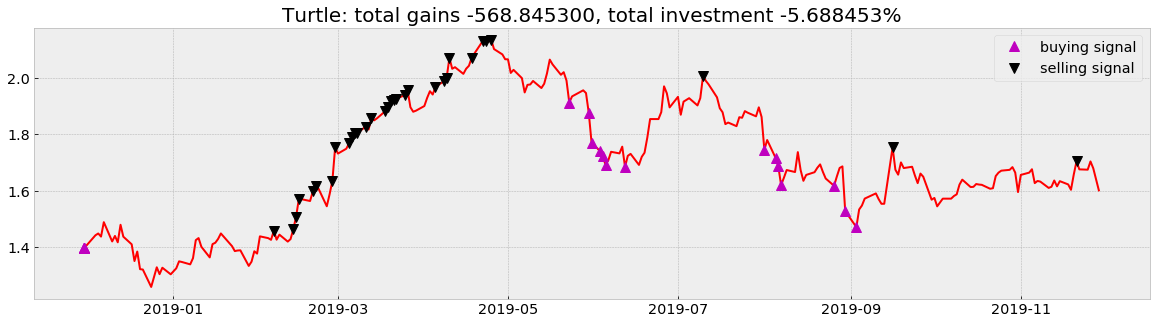

In [55]:
close = df['Close']
fig = plt.figure(figsize = (20,5))
plt.plot(close, color='r', lw=2.)
plt.plot(close, '^', markersize=10, color='m', label = 'buying signal', markevery = states_buy)
plt.plot(close, 'v', markersize=10, color='k', label = 'selling signal', markevery = states_sell)
plt.title('Turtle: total gains %f, total investment %f%%'%(total_gains, invest),fontsize=20)
plt.legend()
plt.savefig("fig12.png")
plt.show()

In [49]:
totals = pd.DataFrame(index=df.index)
totals["total"] = total

In [50]:
totals["returns"] = totals['total'].pct_change()

In [ ]:
rc=
p=
n=

In [13]:
f = lambda rc,p,n:(np.power((1+rc/100),(p/n))-1)*100

In [16]:
f(-0.05688,252,252)

-0.056880000000003594

NameError: name 'sig' is not defined

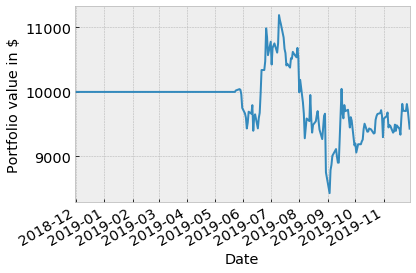

In [26]:
# Import the `pyplot` module as `plt`
import matplotlib.pyplot as plt

# Create a figure
fig = plt.figure()

ax1 = fig.add_subplot(111, ylabel='Portfolio value in $')

# Plot the equity curve in dollars
totals['total'].plot(ax=ax1, lw=2.)

ax1.plot(totals.loc[signals.sumka == 1.0].index, 
         totals.total[signals.sumka == 1.0],
         '^', markersize=10, color='m')
ax1.plot(totals.loc[signals.sumka == -1.0].index, 
         totals.total[signals.sumka == -1.0],
         'v', markersize=10, color='k')

# Show the plot
plt.show()

In [51]:
totals = pd.DataFrame(index=df.index)
totals["total"] = total
totals['signals'] = signals['signal']
totals["returns"] = totals['total'].pct_change()

In [54]:
totals.returns.describe()

count    251.000000
mean      -0.000097
std        0.016622
min       -0.093954
25%        0.000000
50%        0.000000
75%        0.002083
max        0.128272
Name: returns, dtype: float64

C:\Users\wozni\AppData\Local\Continuum\anaconda3\lib\site-packages\pyfolio\pos.py:27: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  'Module "zipline.assets" not found; mutltipliers will not be applied' +


Start date,2018-11-30
End date,2019-11-29
Total months,12
,Backtest
Annual return,-5.7%
Cumulative returns,-5.7%
Annual volatility,26.4%
Sharpe ratio,-0.09
Calmar ratio,-0.23
Stability,0.21
Max drawdown,-24.7%


C:\Users\wozni\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:56: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  return getattr(obj, method)(*args, **kwds)


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,24.65,2019-07-10,2019-09-03,NaT,NaN
1,6.42,2019-05-28,2019-06-12,2019-06-21,19
2,5.10,2019-06-26,2019-07-02,2019-07-10,11
3,0.00,2018-11-30,2018-11-30,2018-11-30,1
4,0.00,2018-11-30,2018-11-30,2018-11-30,1


C:\Users\wozni\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:56: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  return getattr(obj, method)(*args, **kwds)


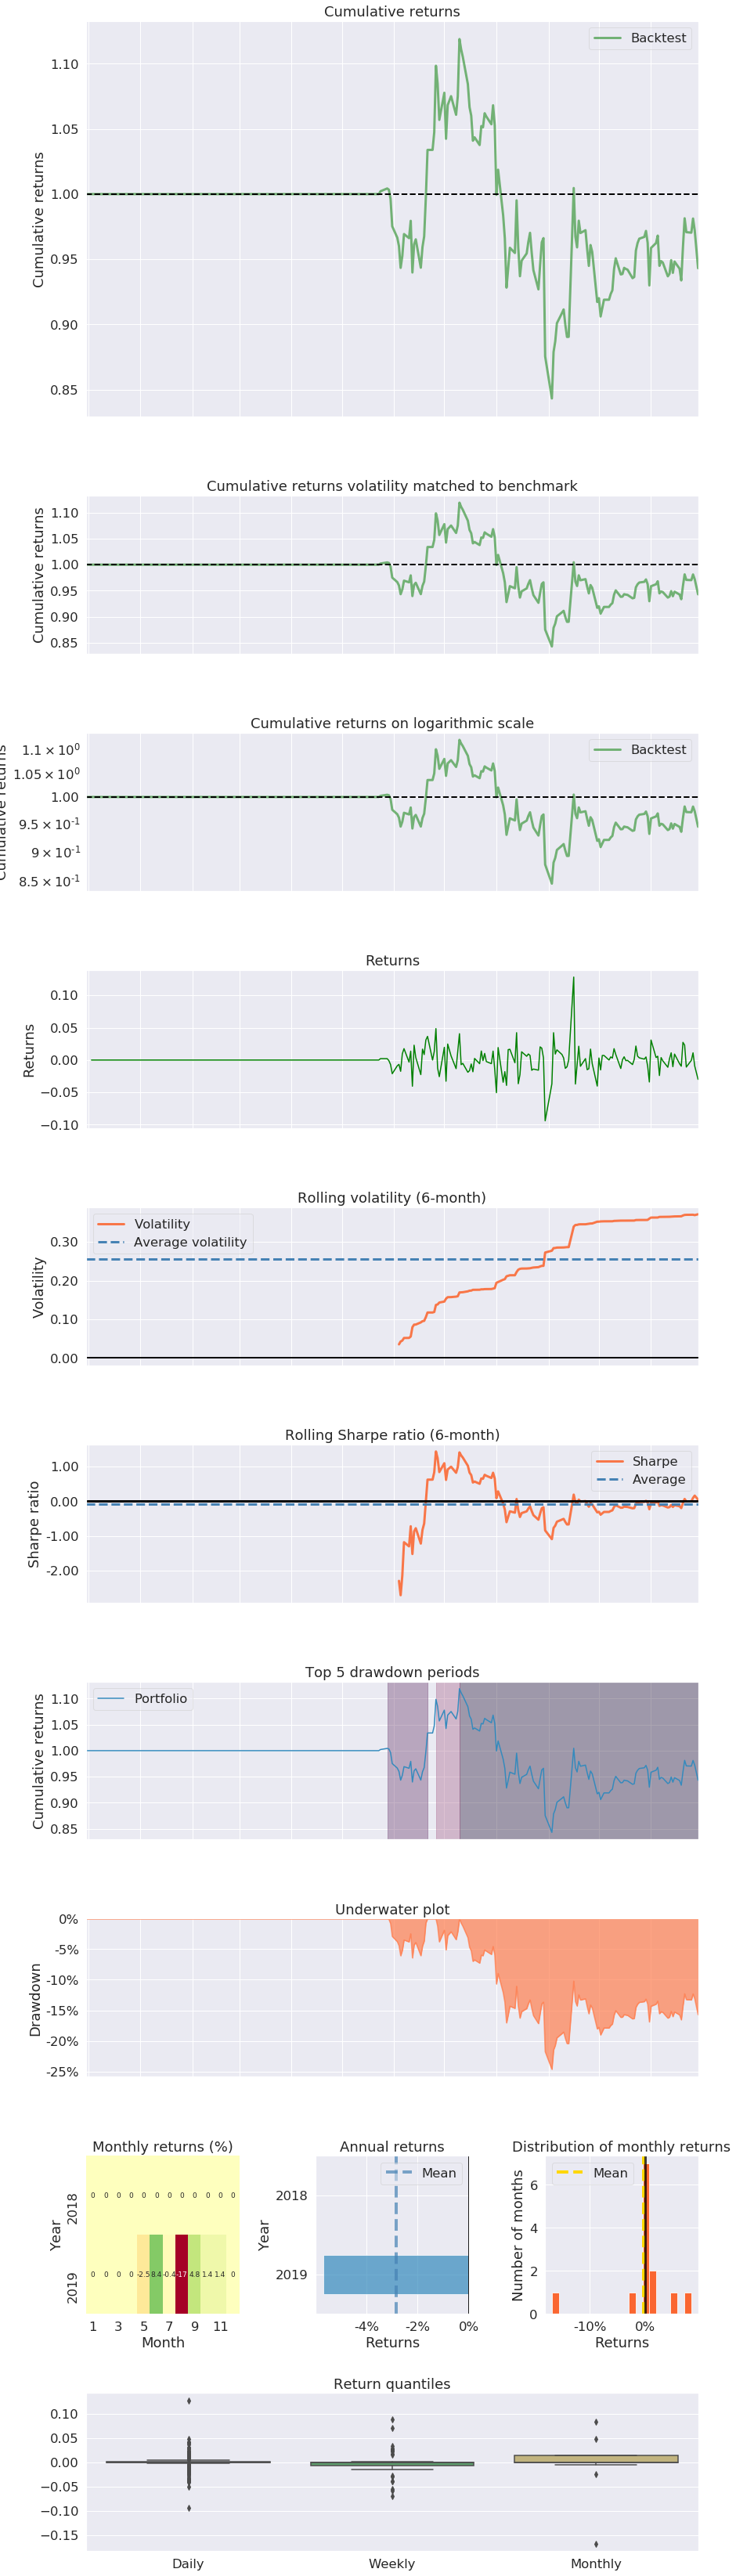

In [53]:
import pyfolio as pf
tmp = pf.create_returns_tear_sheet(totals.returns)